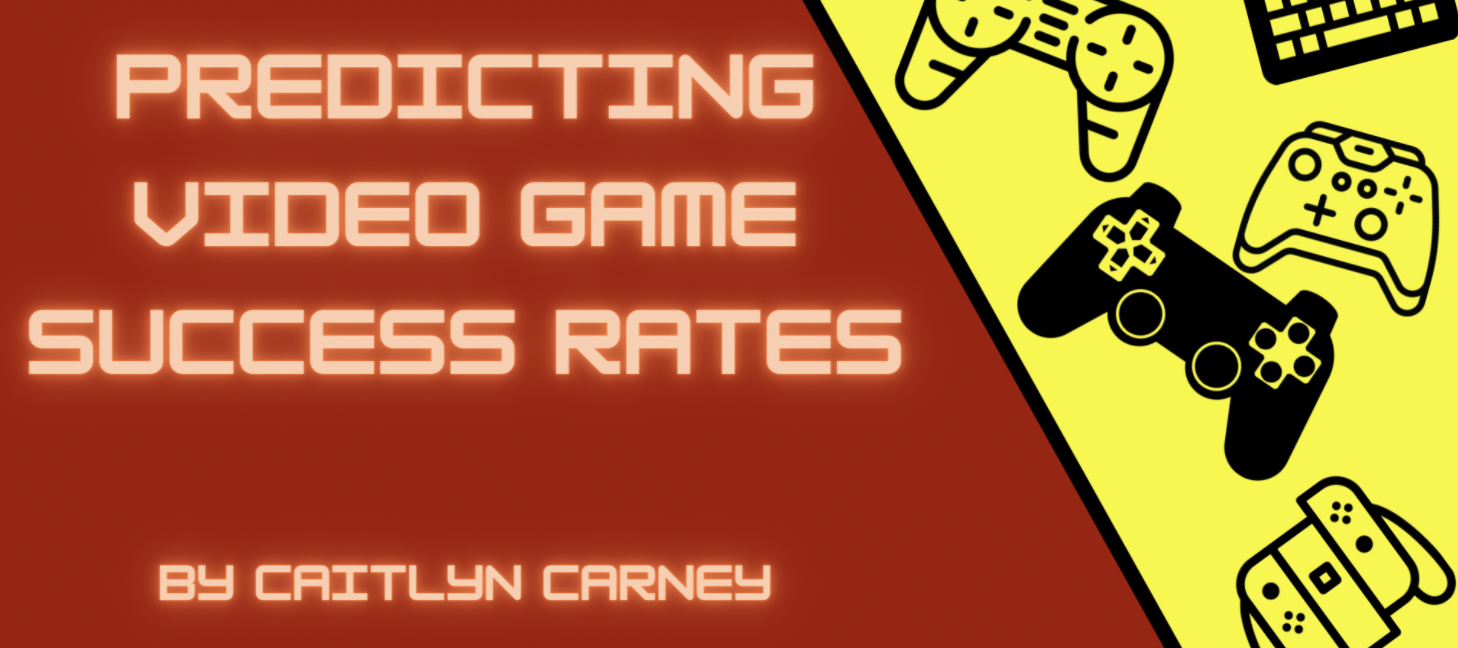

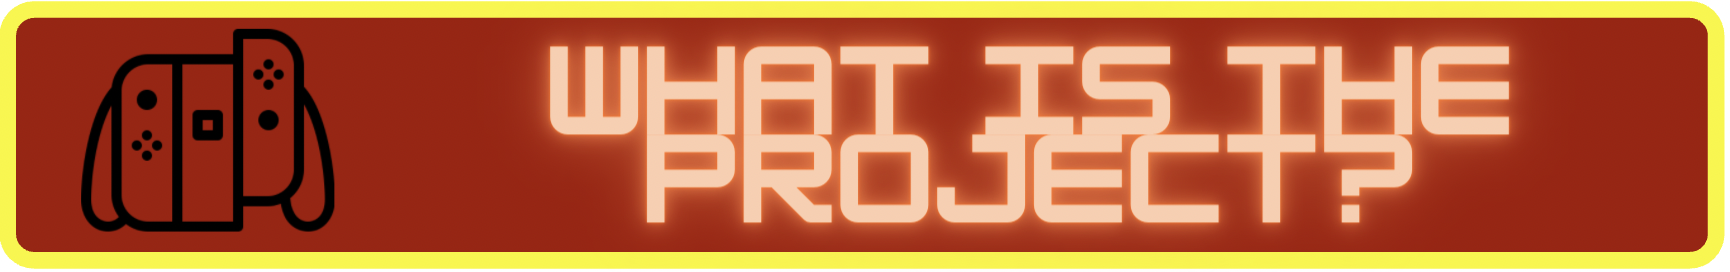

### <span style='color:black'> <span style='background :yellow' > What I am Doing? </span>

Video games. There are many aspects to a good video game. A good video game usually has a good story, good gameplay, good graphics, etc. But is there a way to forsee the level of success a game may have? What determines a games success level? Is there a way to take in information about the game and provide insight into how the public may enjoy it? That is what I aim to answer today.

### <span style='color:black'> <span style='background :yellow' > What Do I Plan on Doing? </span>

My goal is to determine drivers of a games success level and create a model to predict the level of succes wiht as much accuracy as possible.

### <span style='color:black'> <span style='background :yellow' > A Few Things to Note Before Proceeding: </span>

- In this data set we are only looking at games that sold at the minimum 100,000 copies.
    - This means that the all of the games met some sort of success.
    - Therefore, all levels will be successful but in different ways.
- How I defined success:
    - Moderate Success was when a game sold 100,000 copies
        - There very minimum to get onto the list was defined as moderate succeess
    - Fairly successful is where a game sold between 100,00 and 500,000 copies.
        - So it did fairly better than the minimum.
    - Very successful was when a game sold between half a million and 900,000.
        - Not quite a million copies but still very succesful within the industy.
    - Extremely successful is where a game sold over a million copies.
        - This is the dream.

## <span style='color:black'> <span style='background :yellow' > I Initially Hypothesized: </span>

- That the year the game came out affected the success levels. 
- Game sales are effected by the platform it is being sold on. 
    - For example game A may have more sales because it is being sold on a Playstation platfrom, but game B didn't sell as high because it was being sold on Sega.
- Lastly the games primary genre effects game sales. 
    - Some genres may be more popular than others.

## <span style='color:black'> <span style='background :yellow' > I Found That: </span>
- Approximatly 72% of all extremely successful games were made between 1985 and 1990.
- Moderatly Successful games were at an all time low between 1980 and 1985
- The years between 1980 to 1985 made up 42% of all fairly successful games and 21% of all very successful games.
- 3,549 games were made between 2005 and 2010
    - 39.7% being of moderate success
    - 38.8% being fairly succcessful
- About 15.8% of Moderate Success comes from Nintendo games.
- Playstation and computer platfroms have a good distribution of success accross the board.
- Xbox tends to put out more very successful games than any other success level.
- Sega games tend to be of moderate or fair success
- Action Adventure Games have the highest percentage of game success across all success levels
    - Ranging from ~24% to ~32%
- Sport games and RPG's both tend to be on the low end of success levels.
- The Biggest sellers when it comes to genre are Action Adventure, Strategy, and Shooters.
- There are far many Action Adventure games made than any other.
    - Total of 2,545 individual titles.
        - this is 30.2% of all games in this dataset
- Strategy is the second highest 
    - 2,304 games which is 19.27% of games.

In [20]:
import wrangle
import explore
import model

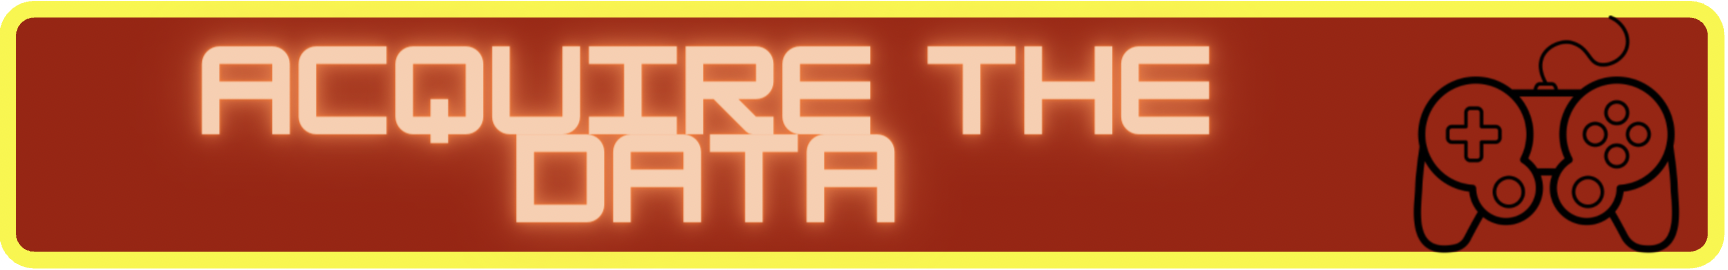

## <span style='color:black'> <span style='background :yellow' > Acquire the Data: </span>

- This data was acquired from kaggle a data set for "Video Game Sales".
    - https://www.kaggle.com/gregorut/videogamesales?select=vgsales.csv
        - Generated by a scrape of vgchartz.com.

In [2]:
df = wrangle.acquire_game_sales()
df.head(3)

0                  1         2     3         4          5         6   \
0  Rank               Name  Platform  Year     Genre  Publisher  NA_Sales   
1     1         Wii Sports       Wii  2006    Sports   Nintendo     41.49   
2     2  Super Mario Bros.       NES  1985  Platform   Nintendo     29.08   

         7         8            9             10  
0  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1     29.02      3.77         8.46         82.74  
2      3.58      6.81         0.77         40.24

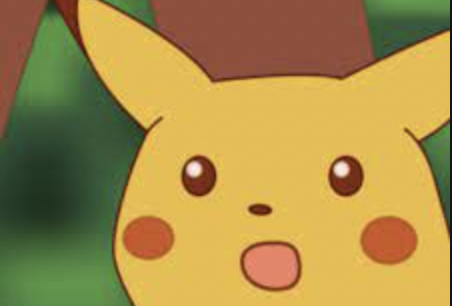

This data set is already pretty clean... However:
- The column names are on the first row.
- There are a lot of Platforms that go together.
- There are Genres that need to go together.
- There are 4 features that feed directly into my target that need to be dropped.

That pika won't pika work.

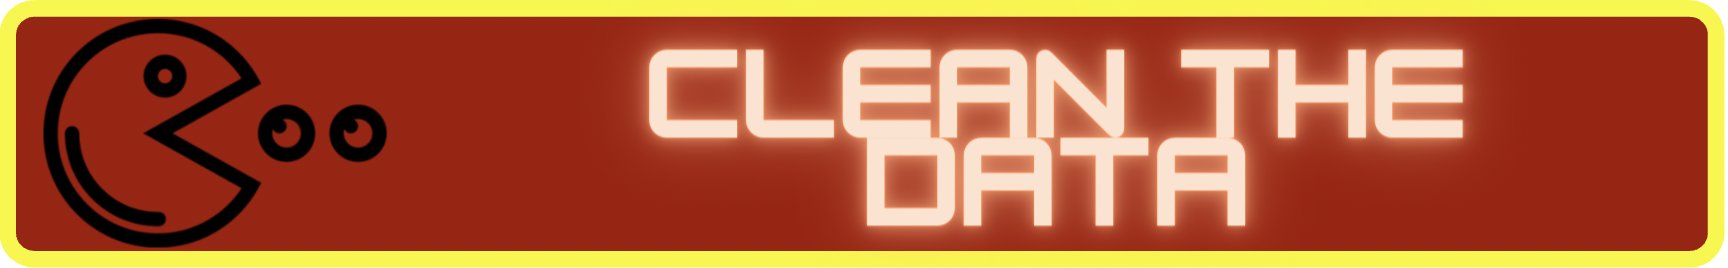

In [3]:
df = wrangle.clean_game_sales(df)
df.head(3)

Platform  Year       Genre Publisher  Global_Sales years_binned  \
Rank                                                                    
1     Nintendo  2006      Sports  Nintendo         82.74        05-10   
2     Nintendo  1985    Platform  Nintendo         40.24        80-85   
3     Nintendo  2008  Simulation  Nintendo         35.82        05-10   

          level_of_success  Nintendo  Playstation  Xbox  ...  Simulation  \
Rank                                                     ...               
1     Extremely Successful         0            1     0  ...           0   
2     Extremely Successful         0            1     0  ...           0   
3     Extremely Successful         0            1     0  ...           0   

      Sports  Misc  Role_Playing  Shooter  Strategy  Moderate_Success  \
Rank                                                                    
1          0     0             0        0         1                 0   
2          1     0             0        0         0                 0   
3          0     0             0        1         0                 0   

      Fairly_Successful  Very_Successful  Extremely_Successful  
Rank                                                            
1                     0                0                     1  
2                     0                0                     1  
3                     0                0                     1  

[3 rows x 24 columns]

### Now that's what I call clean!

- To clean the data I:
    - Moved row 1 to be the column names and removed the row.
    - Created the target feature `level_of_success`
    - Condensed platfroms and genres.
    - Created a dummies for genre and platform
    - Bin the years into a 5 year time frame
    - Drop columns

Just need to split it before going into our exploration.

In [4]:
train, validate, test = wrangle.split_game_sales(df)
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)

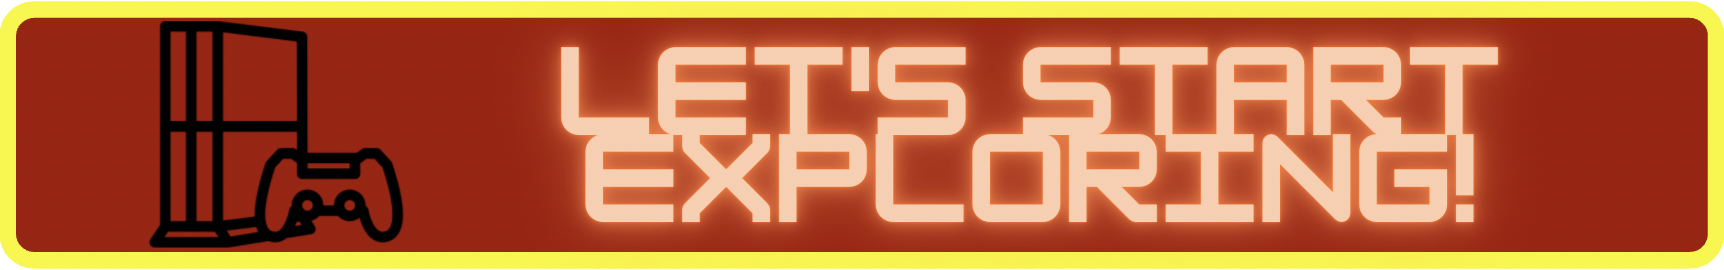

### Explore the Percent of Success Levels Through the Years!

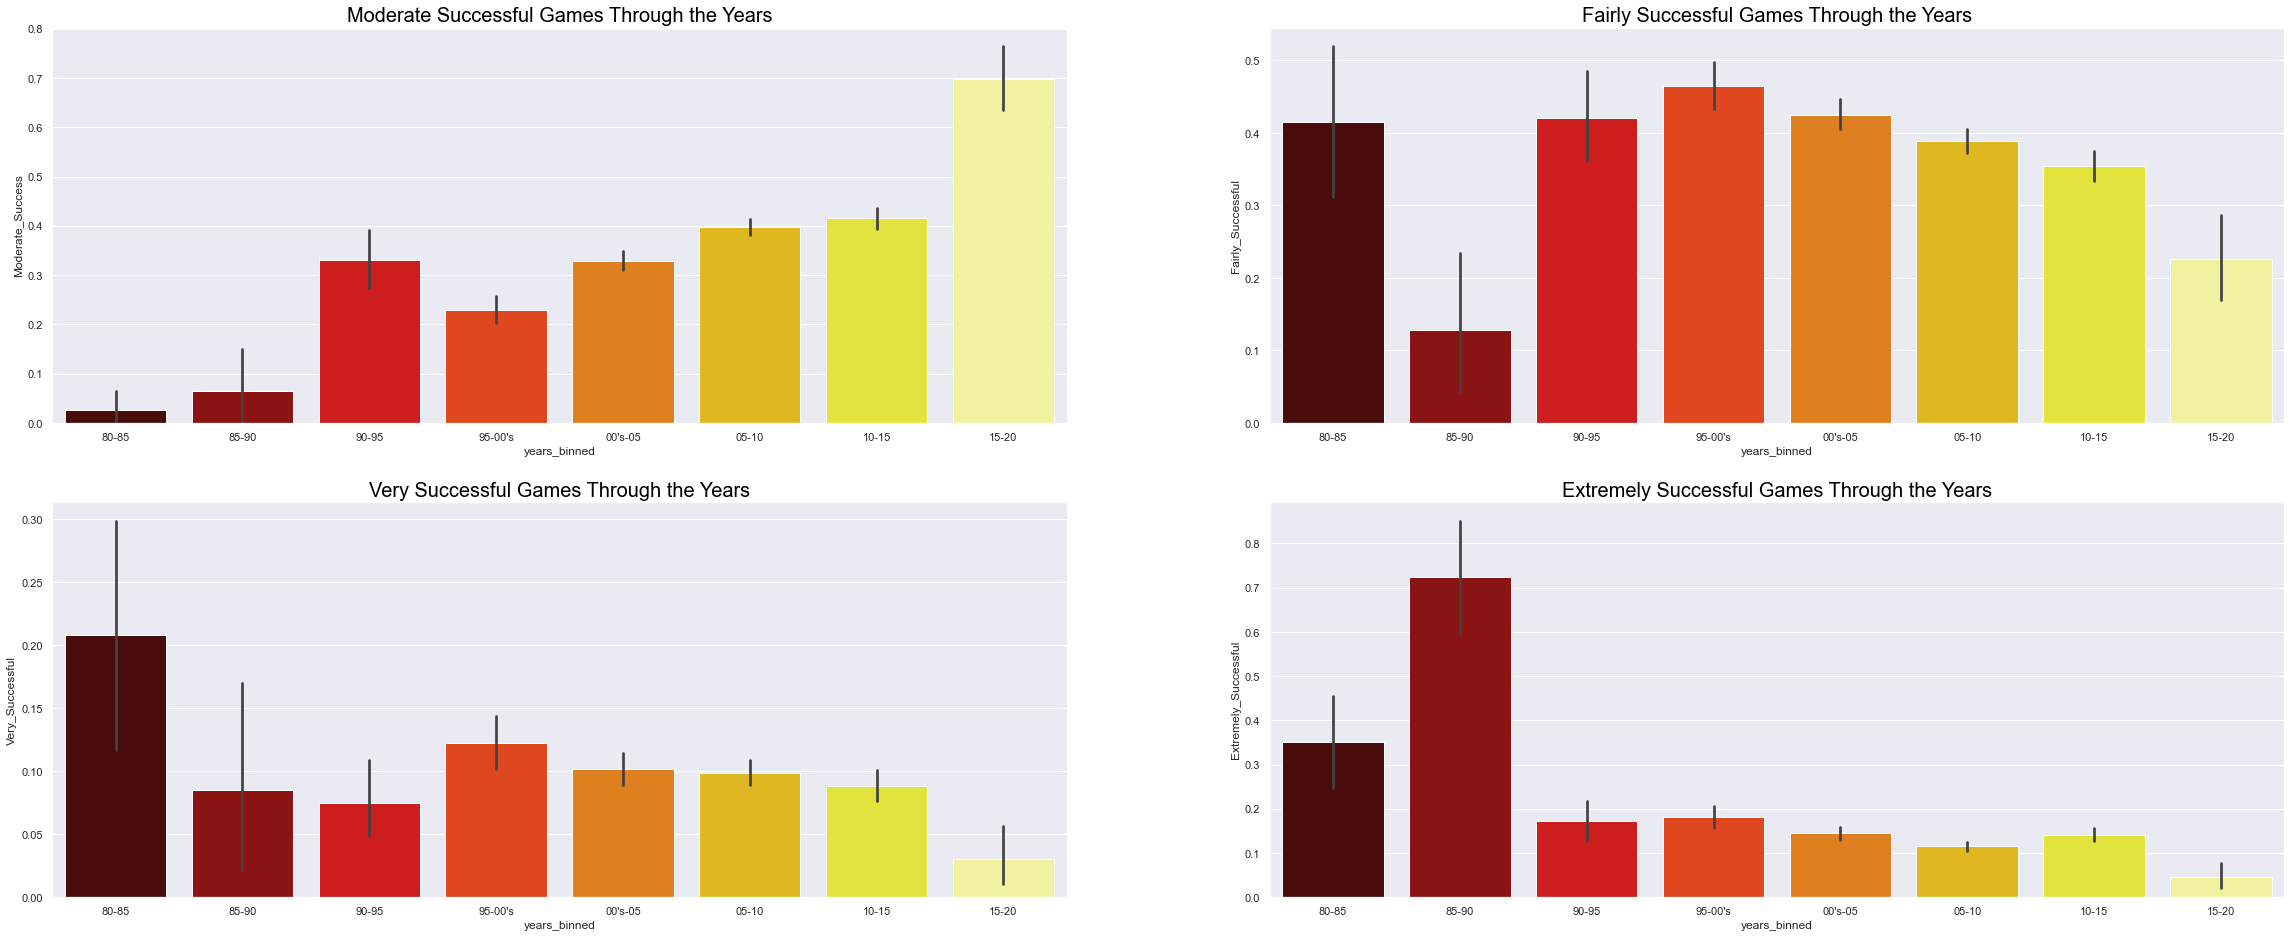

In [5]:
explore.see_success_through_years(train)

#### Takeaways:
- Approximatly 72% of all extremely successful games were made between 1985 and 1990.
    - The amount of Extremly successful games have continued to decrease are years passed.
- Moderate Successful games were at an all time low between 1980 and 1985.
    - However, the amount of moderatly successful games grow more and more through the years.
- The years 1980 to 1985 made up for 42% of all fairly successful games and 21% of all very successful games.

___

### Take a Look at the Numbers

|Year Range|Moderate Success|Fairly Successful|Very Successful|Extremely Successful|Total Individual Titles|
|-----|-------|------|-----|-------|-------|
|1980-1985|2 titles|32 titles|16 titles|27 titles|77 total titles|
|1985-1990 |3 titles|6 titles|4 titles|34 titles|47 total titles|
|1990-1995|88 titles|112 titles|20 titles|46 titles|266 total titles|
|1995-2000's |213 titles|431 titles|113 titles|169 titles|926 total titles|
|2000's-2005|691 titles|896 titles|215 titles|305 titles|2,107 total titles|
|2005-2010|1411 titles|1379 titles|351 titles|408 titles|3,549 total titles|
|2010-2015|820 titles|698 titles|174 titles|278 titles|1,970 total titles|
|2015-2020|136 titles|44 titles|0 titles|9 titles|189 total titles|

#### Takeaways:
- 3,549 games were made between 2005 and 2010.
    - 39.7% being of moderate success
    - 38.8% being fairly succcessful
- 72% of all the games made in 1985 were extremely successful

___

### Explore the Percent of Success Levels Between Each Platform!

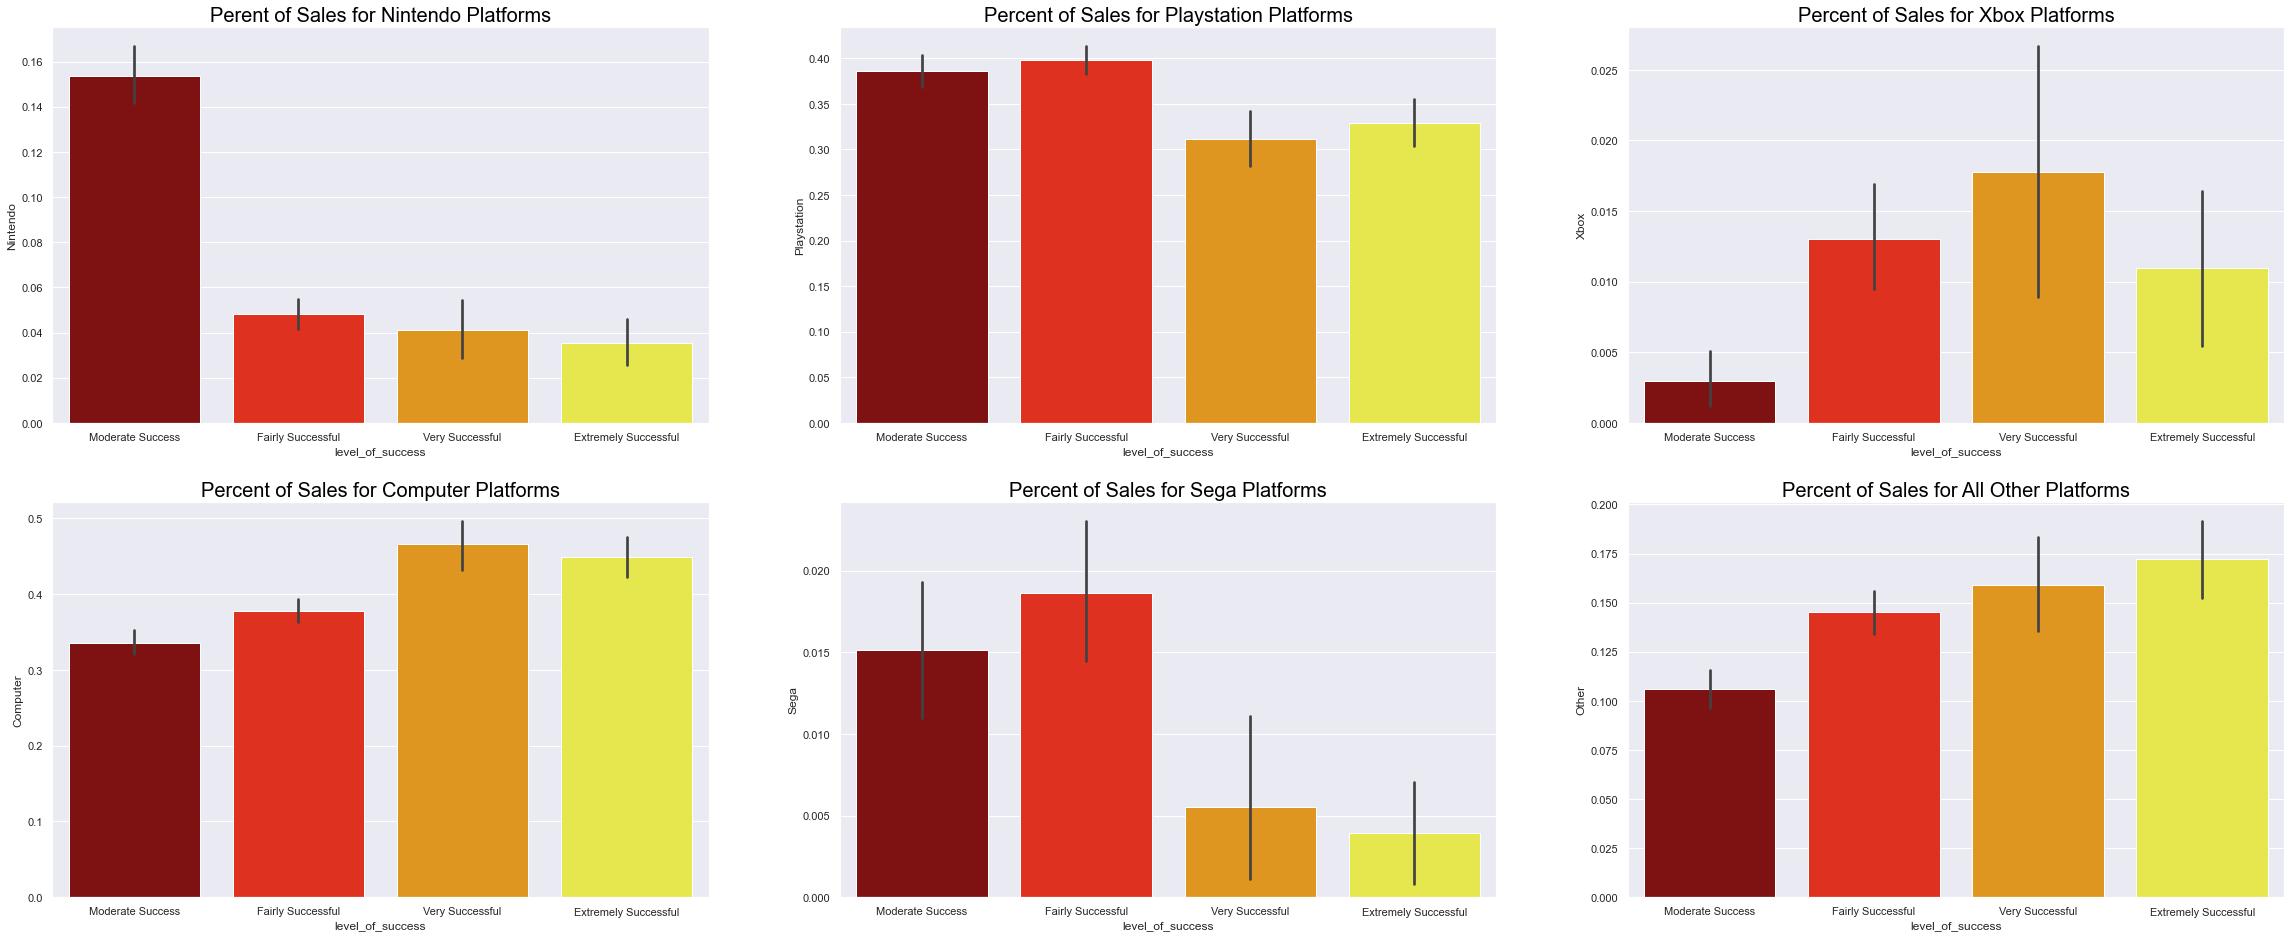

In [6]:
explore.success_percent_per_platform(train)

## Takeaways:
- These are showing the percentage of each success level across each platform type.
- About 15.8% of moderatly successful games comes are on Nintendo platforms.
- Playstation platforms have a fairly good distribution of success. 
    - Their moderate succes: 39% of all moderate successful games
    - Their fairly successful: 40% of all fairly successful games. 
    - Very successful: 33% of all very successful games.
    - Finaly their extrecvely successful games make up for about 32% of all extremely successful games
- Xbox tends to put out more very successful games than any other success rate.
- Computer Platforms have a pretty steady amount of copies sold in all amounts.
    - Moderate succes: 32% of all moderate successful games
    - Their Fairly successful: 34% of all fairly successful games. 
    - Very success: 42% of all very successful games.
    - Extremely successful: 43% of all extremely successful games
- Sega platforms skew more towards lower success than higheer successful games.
- All other platfroms perform very evenly thorugh all success rates
    - Moderate succes: 10.1% of all moderate successful games
    - Fairly successful: 13.8% of all fairly successful games. 
    - Very success:15.7% of all very successful games.
    - Extremely successful: 17.4% of all extremely successful games

___

### Take a Look at the Numbers

|Platform|Moderate Success|Fairly Successful|Very Successful|Extremely Successful|Total Individual Titles|
|-----|-------|------|-----|-------|-------|
|Nintendo|517 titles|173 titles|45 titles|37 titles|772 total titles|
|Playstation|1,432 titles|1,300 titles|421 titles|280 titles|3,433 total titles|
|Xbox|47 titles|16 titles|14 titles|10 titles|87 total titles|
|Computer|1,359 titles|1,129 titles|573 titles|419 titles|3,480 total titles|
|Sega|67 titles|51 titles|5 titles|5 titles|128 total titles|
|Other|522 titles|357 titles|220 titles|143 titles|1,242 total titles|

___

### Explore the Percent of Success Levels Between Each Genre!

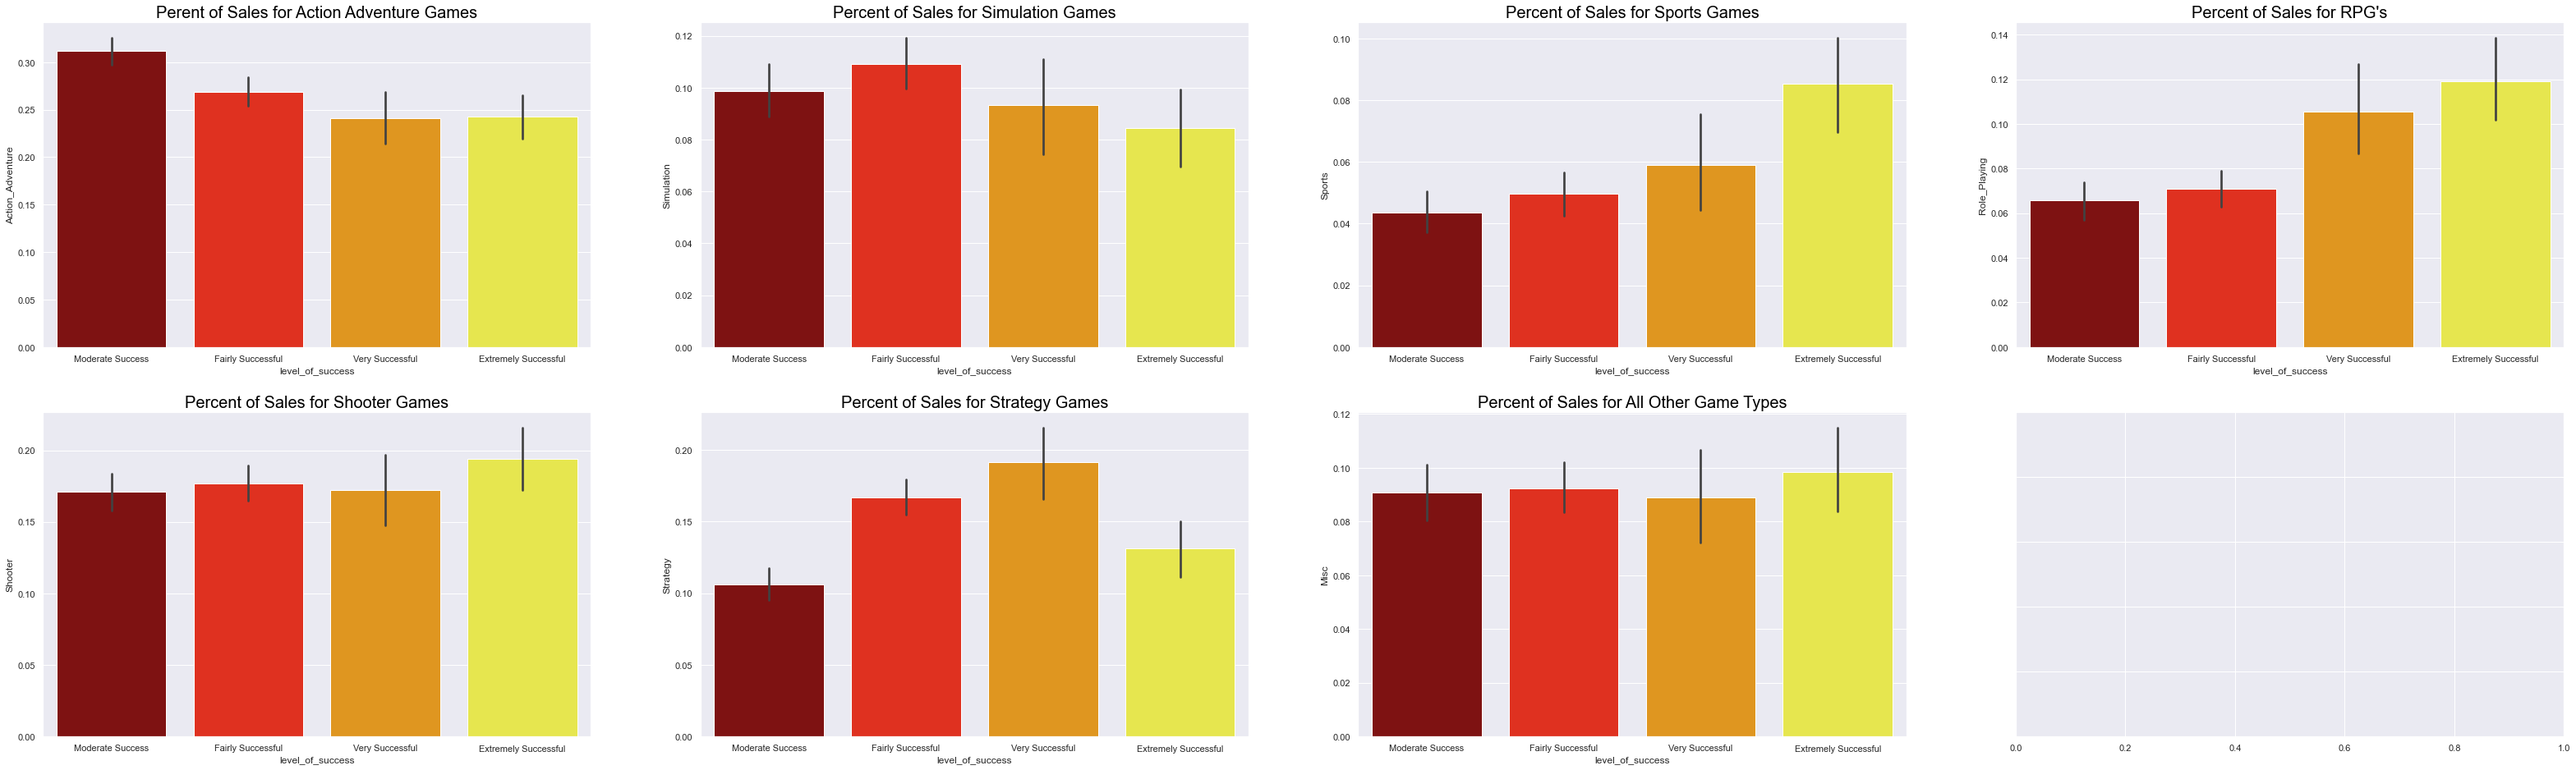

In [7]:
explore.success_percent_per_genre(train)

### Takeaways:
- Action adventure games have the highest percentage of game success across all success levels.
    - Ranging from ~24% to ~32%
- Sport games and RPG's both tend to be on the low end of success level, but both have a spike when selling over 10 million copies.
- The biggest sellers when it comes to genre are action adventure, strategy, and shooters.

___

### Take a Look at the Numbers

|Platfrom|Moderate Success|Fairly Successful|Very Successful|Extremely Successful|Total Number of Titles|
|-----|-------|------|-----|-------|-------|
|Action Adventure|1,050 titles|968 titles|217 titles|310 titles|2,545 titles total|
|Simulation|332 titles|393 titles|84 titles|108 titles|917 titles total|
|Sports|179 titles|147 titles|53 titles|109 titles|488 titles total|
|RPG|221 titles|255 titles|95 titles|152 titles|723 titles total|
|Shooter|575 titles|636 titles|155 titles|248 titles|1,614 titles total|
|Strategy|357 titles|600 titles|172 titles|168 titles|1,297titles total

___

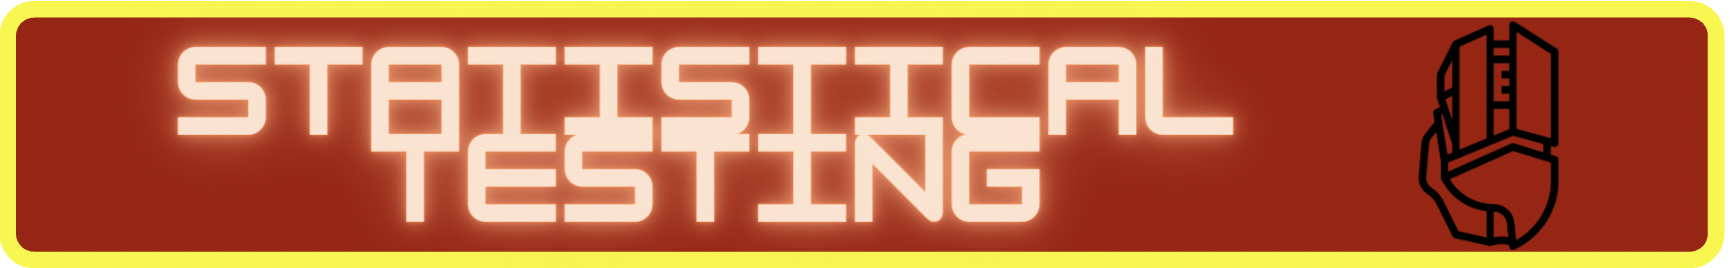

## Testing Genre and Success Levels
Null Hypothesis:  "A games genre and its level of success are independent from each other."

Alternative Hypothesis: "The genre of a game and its success are dependent on one another."


In [8]:
explore.genre_stat_test(train)

I reject the null hypothesis
I reject the hypothesis that: 
 A games genre and its level of success are independent from each other
 
The alpha is: 
 0.05
 
P Value is: 
 0.02294252887716387


___

## Testing Years and Success Levels
Null Hypothesis:  "A games release year and its level of success are independent from each other."

Alternative Hypothesis: "The release year of a game and its success are dependent on one another."

In [9]:
explore.year_stat_test(train)

I reject the null hypothesis
I reject the hypothesis that: 
 A games release year and its level of success are independent from each other
 
The alpha is: 
 0.05
 
P Value is: 
 6.712021410509012e-123


___

## Testing Platform and Success Levels
Null Hypothesis:  "A games genre and its level of success are independent from each other."

Alternative Hypothesis: "The genre of a game and its success are dependent on one another."

In [10]:
explore.platform_stat_test(train)

We reject the null hypothesis
We reject the hypothesis that: 
 A games platform and its level of success are independent from each other
 
The alpha is: 
 0.05
 
P Value is: 
 7.614105483906174e-144


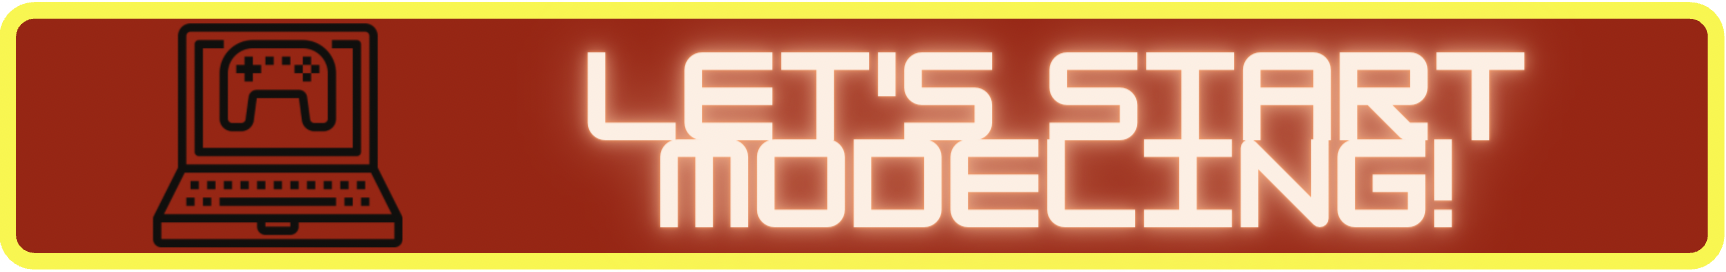

In [11]:
df2 = wrangle.focused_game_sales(df)
train2, validate2, test2 = wrangle.split_focused_game_sales(df2)
X_train2, X_validate2, X_test2, y_train2, y_validate2, y_test2 = wrangle.split_train_validate_test(train2, validate2, test2)

### Finding Baseline Accuracy

In [12]:
model.find_baseline(train)

My baseline accuracy is: 
 0.394


### Classification Report Information

- **Precision**
    - What percent of my predictions wer correct?
        - Precision for Extremely Successful: 0
        - Precision for Fairly Successful: 0.41
        - Precision for Moderate Success: 0.45
        - Precision for Very Successful: 0
- **Recall**
    - What percent of the postive cases did I catch?
        - Recall for Extremely Successful: 0
        - Recall for Fairly Successful: 0.7
        - Recall for Moderate Success: 0.41
        - Recall for Very Successful: 0
- **F1 score**
    - What percent of positive predictions were correct?
        - F1 score for Extremely Successful: 0
        - F1 score for Fairly Successful: 0.52
        - F1 score for Moderate Success: 0.43
        - F1 score for Very Successful: 0
    - What is the accuracy of the f1 score prediction?
        - 0.43

### Logistic Regression Model Informaiton

In [14]:
model.get_logit1(X_train2, X_validate2, X_test2, y_train2, y_validate2, y_test2)

Accuracy of Logit 1 Model on Train: 
 0.4266
Accuracy of Logit 1 Model on Validate: 
 0.4271
Accuracy of Logit 1 Model on Test: 
 0.4235


### Decision Tree Model Information

In [15]:
model.decision_tree(X_train2, X_validate2, X_test2, y_train2, y_validate2, y_test2)

Accuracy of Decision Tree Model on Train: 
 0.4339
Accuracy of Decision Tree Model on Validate: 
 0.4269
Accuracy of Decision Tree Model on Test: 
 0.4339


### KNN Model Information

In [16]:
model.KNN_model(X_train2, X_validate2, X_test2, y_train2, y_validate2, y_test2)

accuracy is 0.47
Accuracy of KNN Model on Train: 
 0.4696
Accuracy of KNN Model on Validate: 
 0.4167
Accuracy of KNN Model on Test: 
 0.4133


### Random Forest Model Information

In [17]:
model.random_forest_model(X_train2, X_validate2, X_test2, y_train2, y_validate2, y_test2)

Accuracy of Random Forest Classifier on Train: 
 0.4486
Accuracy of Random Forest Classifier on Validate: 
 0.4412
Accuracy of Random Forest Classifier on Test: 
 0.432


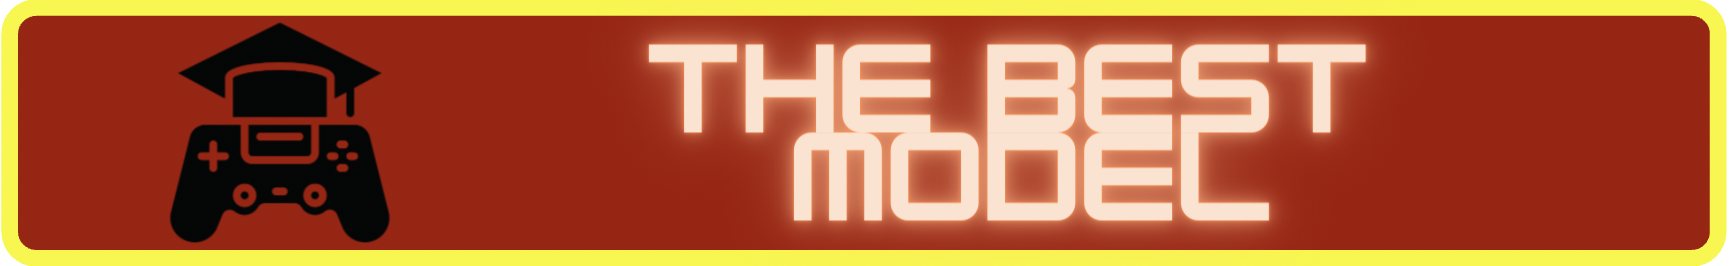

In [18]:
model.all_models(X_train2, X_validate2, X_test2, y_train2, y_validate2, y_test2)

accuracy is 0.47
The Baseline Accuracy is: 
 0.3938
________________________________________________
Accuracy of Logit 1 Model on Train: 
 0.4266
________________________________________________
Accuracy of Decision Tree Model on Train: 
 0.4339
________________________________________________
Accuracy of KNN Model on Train: 
 0.4696
________________________________________________
Accuracy of Random Forest Classifier on Train: 
 0.4486


### I ended up using the Decision Tree model.

The reason is because I initially started with the KNN model but whe I got to testing I found out that KNN performed worse than the Decision Tree.

In [19]:
model.decision_tree(X_train2, X_validate2, X_test2, y_train2, y_validate2, y_test2)

Accuracy of Decision Tree Model on Train: 
 0.4339
Accuracy of Decision Tree Model on Validate: 
 0.4269
Accuracy of Decision Tree Model on Test: 
 0.4339


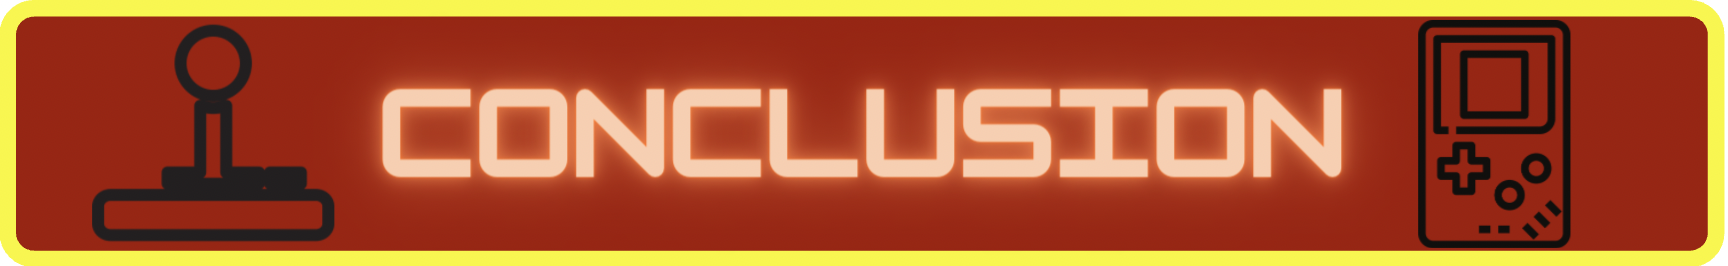

### <span style='color:black'> <span style='background :yellow' >What I Found for Release Year</span>

There is a different distribution of games success levels based on the year they were released. 
- With 1985 to 1990 putting out 72% of all extremely succesful games
- 1980 to 1995 making up for 42% of all fairly successful games and 21% of all very successful games.

### <span style='color:black'> <span style='background :yellow' >What I Found for Platform</span>

I found that a games platform had diffrent amounts of success. 
- Nintendo platform for example put out more modetatly successful games, making up for 15.8% of all of this success level. 
- Playstation platforms tend to have higher numbers of titles across all leveles of success, as well as computer platforms. 
- Xbox puts out more very successful game than any other of the success levels 
- Finally Sega tends to be of moderate or fairly successful games.

### <span style='color:black'> <span style='background :yellow' >What I Found for Genre</span>

I found that genres' each have different amounts of success. 
- Action adventure being the most through all levels (probably because it is the most made genre). 
- Sports and RPG's tend to be on the lower end of the success rates.

The biggest sellers when it comes to genre are action adventure, strategy, and shooters. 
- There are far more action adventure games made than any other, with a total of 2,545 individual titles which is 30.2% of all games. 
- Strategy is the second highest with 2,304 games which is 19.27% of all games. 
- The lowest produced game type that sold a minimum of 100 thousand copies is Sports with only 876 game titles.

### <span style='color:black'> <span style='background :yellow' >In the end</span>

I found that genre, year, and platform have an effect on the level of success a game would have. 
    
**Although, it is not perfect, it does give us insight to how much success a game may have.**

### <span style='color:black'> <span style='background :yellow' >With further time</span>
With further time I would like to see about getting further data maybe including 
- critic scores
- developer
- if the game is online or not
- multiplayer or solo
- and possibly the amount of time the game was in development.

### <span style='color:black'> <span style='background :yellow' >I recommend</span>
Utalizing the Decision Tree model to help give insight to a games possible level of success within the industry.



___

# The End

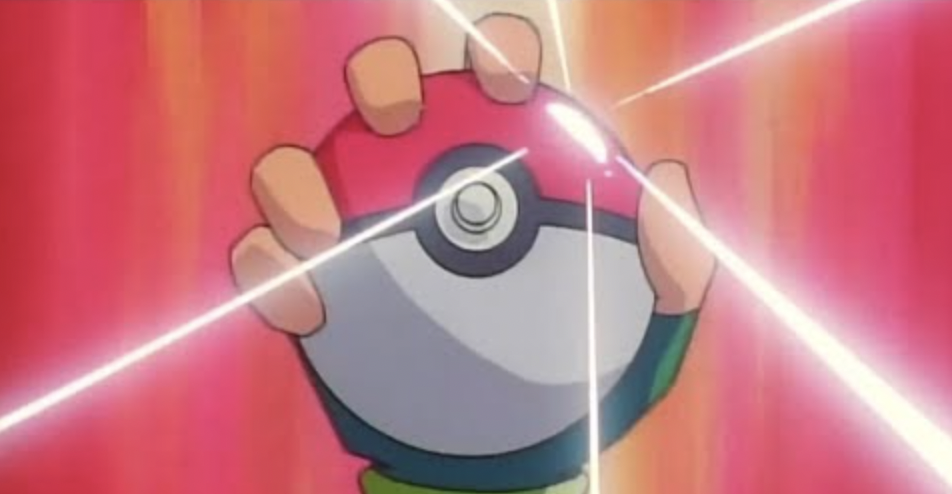